### Table of Contents

* [1. Import winequality dataset](#import_dataset)
* [2. Exploratory Data Analysis (EDA)](#eda)
    * [2.1. General information about dataset](#general_info_dataset)
    * [2.2. Histogram of target variable (quality)](#hist_of_target)
    * [2.3. Correlation matrix](#corr_matrix)
    * [2.4. Distribution of some attributes for qualities](#dist_of_attr)
* [3. Data Preprocessing](#preprocessing)
    * [3.1. Checking missing values](#missing_values)
    * [3.2. Over-sampling the imbalanced data](#oversampling)
    * [3.3. Scaling features (standardization)](#standardization)
    * [3.4. Split data to train and test](#split)
* [4. Creating Models](#creat_models)
    * [4.1. Decision tree](#dec_tree)
    * [4.2. K nearest neighbours](#knn)
    * [4.3. Random forest](#random_forest)
* [5. Model Evaluation](#evaluate_models)

<h2>Ahmet ARDAHANLI</h2>

# 1. Import winequality dataset
<a id="import_dataset"></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

SEED = 42

In [2]:
df = pd.read_csv("winequality.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 2. Exploratory Data Analysis (EDA)
<a id="eda"></a>

## 2.1. General information about dataset
<a id="general_info_dataset"></a>

**Input Variables:**

- fixed acidity: most acids involved with wine or fixed or nonvolatile
- volatile acidity: the amount of acetic acid in wine
- citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines
- residual sugar: the amount of sugar remaining after fermentation stops
- chlorides: the amount of salt in the wine
- free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion
- total sulfur dioxide: amount of free and bound forms of S02
- density: the density of water is close to that of water depending on the percent alcohol and sugar content
- pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic)
- sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels
- alcohol: the percent alcohol content of the wine

**Target Variable:**

- quality: output variable

In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


We have 1599 samples on dataset. There are 11 independent variables (features) and 1 dependent variable (target). All features are type of continious (float64). Target variable is int64 data type and tells us the class of wine. It can take 6 values between 3 and 8. Also target variable is a ordinal data. The wine which has big quality number higher quality than the small number. That is, 8 means the most quality wine class.

## 2.2. Histogram of target variable (quality)
<a id="hist_of_target"></a>

Our target variable is **quality**. Let's see which values this column contains and how many of them there are.

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


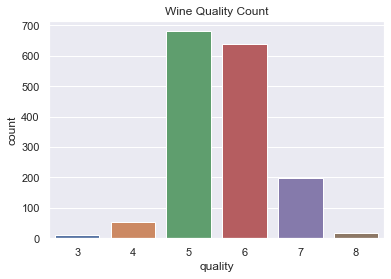

In [5]:
print(df['quality'].value_counts())
sns.countplot(x='quality', data=df)
plt.title('Wine Quality Count')
plt.show()

Target variable (quality) has 6 different values between 3-8. The data looks very **unbalanced** for different wine quality classes. The data is very less for quality 3,4,7,8 as compared to 5,6. Most of samples belong to 5 and 6 classes. These two classes have the 82% of all data. 

## 2.3. Correlation matrix
<a id="corr_matrix"></a>

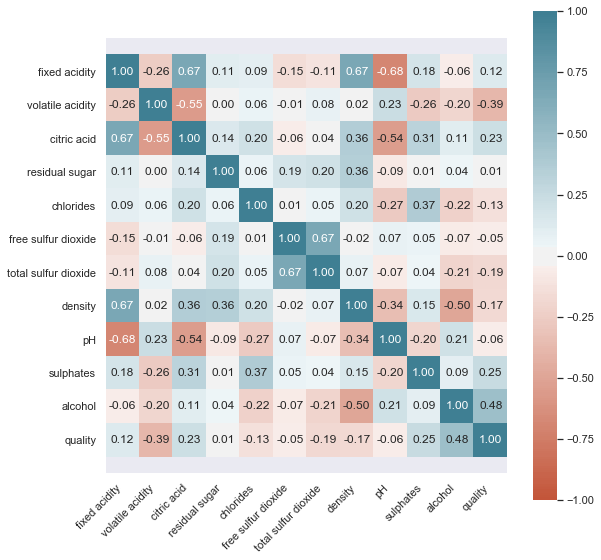

In [6]:
corr = df.corr()

plt.figure(figsize=(9, 9))
ax = sns.heatmap(
    corr,
    fmt = ".2f",
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

According to figure in above, we can observe the following items:

**1. Relevancy check (IV to DV)**

* Quality has a (+) relationship with alcohol ***(0.48)***
* Quality has a (-) weak relationship  with volatile_acidicity ***-0.39***
* Quality has almost no relationship with residual_sugar, free_sulfur_dioxide, and pH.***(corr =~ 0)***

**2. Multicolinearity check (IV to IV)**

* There is a a (-) relationship between **alcohol** and **density** *(-0.50)*
* There is a a (-) relationship between **volatile_acidicity** and **citric_acid** *(-0.55)*
* There is a a (+) relationship between **density** and **fixed_acidicity** *(0.67)*
* There is a a (+) relationship between **citric_acid** and **fixed_acidicity** *(0.67)*
* There is a a (-) relationship between **citric_acid** and **pH** *(-0.54)*

> IV: Independent variable
> 
> DV: Dependent variable

Also we can make relevancy check like below.

In [7]:
#Calculate and order correlations
correlations = df.corr()['quality'].sort_values(ascending=False)
print(correlations)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


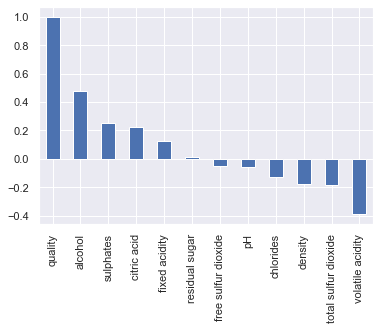

In [8]:
correlations.plot(kind='bar')

## 2.4. Distribution of some attributes for qualities
<a id="dist_of_attr"></a>

From all the values, we are selecting alcohol, sulphates, citric acid and volatile acidity in order to study them better and see the distribution of values that separate the different qualities.

### Alcohol percent

[Text(0.5, 1.0, 'Alcohol Percent in Different Quality Wines')]

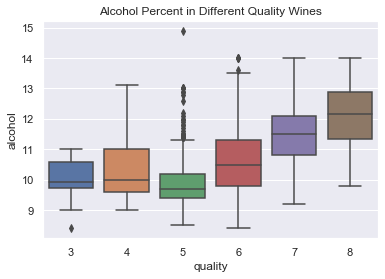

In [9]:
bp = sns.boxplot(x='quality',y='alcohol', data=df)
bp.set(title="Alcohol Percent in Different Quality Wines")

On this boxplot we can see how wines that contain less alcohol seem to be getting worse ratings while the ones with higher alcohol % are getting better quality ratings. However, we can observe how "mid quality" wines with rating 5 or 6 are presenting some strange values.

### Sulphates and citric acid presence

[Text(0.5, 1.0, 'Sulphates in Different Quality Wines')]

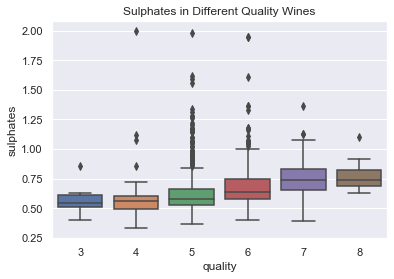

In [10]:
bp = sns.boxplot(x='quality',y='sulphates', data=df)
bp.set(title="Sulphates in Different Quality Wines")

[Text(0.5, 1.0, 'Citric Acid in Different Quality Wines')]

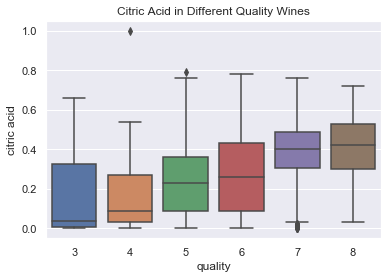

In [11]:
bp = sns.boxplot(x='quality',y='citric acid', data=df)
bp.set(title="Citric Acid in Different Quality Wines")

In the case of the features "sulphates" and "citric acid" the relation between them and quality seem to be linearly positive, showing our correlation coefficients calculated before were right: adding higher amounts of sulphates and citric acid to these wines seem to get them higher quality ratings.

### Acetic acid presence

[Text(0.5, 1.0, 'Acetic Acid Presence in Different Quality Wines')]

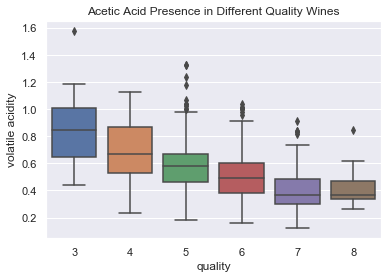

In [12]:
bp = sns.boxplot(x='quality',y='volatile acidity', data=df)
bp.set(title="Acetic Acid Presence in Different Quality Wines")

For the acetic acid presence, we can clearly observe how less acetic acid presence in wine seems positive while having higher values contribute to having a lower rating.

# 3. Data Preprocessing
<a id="preprocessing"></a>

We are importing necessary python libraries for case.

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## 3.1. Checking missing values
<a id="missing_values"></a>

In [14]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We don't have any missing values on dataset as seen above.

## 3.2. Over-sampling the imbalanced data
<a id="oversampling"></a>

In [15]:
print(df['quality'].value_counts())

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


As we can see above, the data is unbalanced. To solve this problem we use over-sampling. After this operation, we have 4086 samples total and each of 6 classes have same sample counts (681).

In [16]:
## oversampling
from imblearn.over_sampling import SMOTE
os=SMOTE()

X=df.drop(['quality'], axis=1)
y=df['quality']

X_res,y_res=os.fit_sample(X, y)

print(f"X_res shape: {X_res.shape}")
print(f"y_res shape: {y_res.shape}")

X_res shape: (4086, 11)
y_res shape: (4086,)


In [17]:
y_res.value_counts()

7    681
5    681
3    681
8    681
6    681
4    681
Name: quality, dtype: int64

## 3.3. Scaling features (standardization)
<a id="standardization"></a>

In [18]:
# Scale feature variables
X_scaled = StandardScaler().fit_transform(X_res)
print(f"X_scaled shape: {X_scaled.shape}")
print(f"y_res shape: {y_res.shape}")

X_scaled shape: (4086, 11)
y_res shape: (4086,)


## 3.4. Split data to train and test
<a id="split"></a>

We are splitting both scaled data and notscaled data to be able to evaluate different models in forward.

In [19]:
# Split not scaled dataset into 70% train, 30% test
X_train_notscaled, X_test_notscaled, y_train_notscaled, y_test_notscaled = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

print(f"X_train_notscaled shape: {X_train_notscaled.shape}")
print(f"y_train_notscaled shape: {y_train_notscaled.shape}")
print(f"X_test_notscaled shape: {X_test_notscaled.shape}")
print(f"y_test_notscaled shape: {y_test_notscaled.shape}")

print('\n')

# Split scaled dataset into 70% train, 30% test
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_res, test_size=0.3, random_state=42)

print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"y_train_scaled shape: {y_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print(f"y_test_scaled shape: {y_test_scaled.shape}")

X_train_notscaled shape: (2860, 11)
y_train_notscaled shape: (2860,)
X_test_notscaled shape: (1226, 11)
y_test_notscaled shape: (1226,)


X_train_scaled shape: (2860, 11)
y_train_scaled shape: (2860,)
X_test_scaled shape: (1226, 11)
y_test_scaled shape: (1226,)


# 4. Creating Models
<a id="creat_models"></a>

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
from sklearn.metrics import roc_auc_score, ConfusionMatrixDisplay, confusion_matrix, plot_confusion_matrix

from pandas import DataFrame

We have imported some necessary libraries for classifier and metrics. Now we will creat 3 different classification models by using Knn, Random forest and decision tree classifiers.

## 4.1. Decision tree
<a id="dec_tree"></a>

In [21]:
classifier_dt = DecisionTreeClassifier(random_state = SEED)
classifier_dt.fit(X_train_scaled, y_train_scaled)

y_pred_dt_train_scaled = classifier_dt.predict(X_train_scaled)
accuracy_dt_train = accuracy_score(y_train_scaled, y_pred_dt_train_scaled)
print("Training set: ", accuracy_dt_train)

y_pred_dt_test_scaled = classifier_dt.predict(X_test_scaled)
accuracy_dt_test = accuracy_score(y_test_scaled, y_pred_dt_test_scaled)
print("Test set: ", accuracy_dt_test)

Training set:  1.0
Test set:  0.7920065252854812


In [22]:
# Classification Report for Test Set
print(classification_report(y_test_scaled,y_pred_dt_test_scaled))

              precision    recall  f1-score   support

           3       0.96      0.97      0.96       200
           4       0.79      0.86      0.82       197
           5       0.70      0.70      0.70       218
           6       0.61      0.50      0.55       220
           7       0.74      0.82      0.78       188
           8       0.95      0.95      0.95       203

    accuracy                           0.79      1226
   macro avg       0.79      0.80      0.79      1226
weighted avg       0.79      0.79      0.79      1226



In [23]:
# Metrics for Train Set
macro_precision_dt_train = precision_score(y_train_scaled, y_pred_dt_train_scaled, average='macro')
macro_recall_dt_train = recall_score(y_train_scaled, y_pred_dt_train_scaled, average='macro')
accuracy_dt_train = accuracy_score(y_train_scaled, y_pred_dt_train_scaled)
macro_f1_dt_train = f1_score(y_train_scaled, y_pred_dt_train_scaled,average='macro')

print("Precision = {:.3f}".format(macro_precision_dt_train))
print("Recall = {:.3f}".format(macro_recall_dt_train))
print("Accuracy = {:.3f}".format(accuracy_dt_train))
print("F1 Score = {:.3f}".format(macro_f1_dt_train))

Precision = 1.000
Recall = 1.000
Accuracy = 1.000
F1 Score = 1.000


In [24]:
# Metrics for Test Set
macro_precision_dt_test = precision_score(y_test_scaled, y_pred_dt_test_scaled, average='macro')
macro_recall_dt_test = recall_score(y_test_scaled, y_pred_dt_test_scaled, average='macro')
accuracy_dt_test = accuracy_score(y_test_scaled, y_pred_dt_test_scaled)
macro_f1_dt_test = f1_score(y_test_scaled, y_pred_dt_test_scaled,average='macro')

print("Precision = {:.3f}".format(macro_precision_dt_test))
print("Recall = {:.3f}".format(macro_recall_dt_test))
print("Accuracy = {:.3f}".format(accuracy_dt_test))
print("F1 Score = {:.3f}".format(macro_f1_dt_test))

Precision = 0.790
Recall = 0.798
Accuracy = 0.792
F1 Score = 0.792


## 4.2. K nearest neighbours
<a id="knn"></a>

In [25]:
classifier_knn = KNeighborsClassifier()
classifier_knn.fit(X_train_scaled, y_train_scaled)

y_pred_knn_train_scaled = classifier_knn.predict(X_train_scaled)
accuracy_knn_train = accuracy_score(y_train_scaled, y_pred_knn_train_scaled)
print("Training set: ", accuracy_knn_train)

y_pred_knn_test_scaled = classifier_knn.predict(X_test_scaled)
accuracy_knn_test = accuracy_score(y_test_scaled, y_pred_knn_test_scaled)
print("Test set: ", accuracy_knn_test)

Training set:  0.8587412587412587
Test set:  0.7773246329526917


In [26]:
# Classification Report for Test Set
print(classification_report(y_test_scaled,y_pred_knn_test_scaled))

              precision    recall  f1-score   support

           3       0.92      1.00      0.96       200
           4       0.72      0.96      0.83       197
           5       0.70      0.56      0.62       218
           6       0.66      0.35      0.45       220
           7       0.74      0.88      0.80       188
           8       0.87      1.00      0.93       203

    accuracy                           0.78      1226
   macro avg       0.77      0.79      0.76      1226
weighted avg       0.76      0.78      0.76      1226



In [27]:
# Metrics for Train Set
macro_precision_knn_train = precision_score(y_train_scaled, y_pred_knn_train_scaled, average='macro')
macro_recall_knn_train = recall_score(y_train_scaled, y_pred_knn_train_scaled, average='macro')
accuracy_knn_train = accuracy_score(y_train_scaled, y_pred_knn_train_scaled)
macro_f1_knn_train = f1_score(y_train_scaled, y_pred_knn_train_scaled,average='macro')

print("Precision = {:.3f}".format(macro_precision_knn_train))
print("Recall = {:.3f}".format(macro_recall_knn_train))
print("Accuracy = {:.3f}".format(accuracy_knn_train))
print("F1 Score = {:.3f}".format(macro_f1_knn_train))

Precision = 0.853
Recall = 0.855
Accuracy = 0.859
F1 Score = 0.849


In [28]:
# Metrics for Test Set
macro_precision_knn_test = precision_score(y_test_scaled, y_pred_knn_test_scaled, average='macro')
macro_recall_knn_test = recall_score(y_test_scaled, y_pred_knn_test_scaled, average='macro')
accuracy_knn_test = accuracy_score(y_test_scaled, y_pred_knn_test_scaled)
macro_f1_knn_test = f1_score(y_test_scaled, y_pred_knn_test_scaled,average='macro')

print("Precision = {:.3f}".format(macro_precision_knn_test))
print("Recall = {:.3f}".format(macro_recall_knn_test))
print("Accuracy = {:.3f}".format(accuracy_knn_test))
print("F1 Score = {:.3f}".format(macro_f1_knn_test))

Precision = 0.766
Recall = 0.789
Accuracy = 0.777
F1 Score = 0.763


## 4.3. Random forest
<a id="random_forest"></a>

In [29]:
classifier_rf = RandomForestClassifier(random_state=SEED)
classifier_rf.fit(X_train_scaled, y_train_scaled)

y_pred_rf_train_scaled = classifier_rf.predict(X_train_scaled)
accuracy_rf_train = accuracy_score(y_train_scaled, y_pred_rf_train_scaled)
print("Training set: ", accuracy_rf_train)

y_pred_rf_test_scaled = classifier_rf.predict(X_test_scaled)
accuracy_rf_test = accuracy_score(y_test_scaled, y_pred_rf_test_scaled)
print("Test set: ", accuracy_rf_test)

Training set:  1.0
Test set:  0.8474714518760196


In [30]:
# Classification Report for Test Set
print(classification_report(y_test_scaled,y_pred_rf_test_scaled))

              precision    recall  f1-score   support

           3       0.95      1.00      0.98       200
           4       0.86      0.96      0.91       197
           5       0.72      0.72      0.72       218
           6       0.75      0.51      0.61       220
           7       0.81      0.95      0.87       188
           8       0.97      0.99      0.98       203

    accuracy                           0.85      1226
   macro avg       0.84      0.86      0.84      1226
weighted avg       0.84      0.85      0.84      1226



In [31]:
# Metrics for Train Set
macro_precision_rf_train = precision_score(y_train_scaled, y_pred_rf_train_scaled, average='macro')
macro_recall_rf_train = recall_score(y_train_scaled, y_pred_rf_train_scaled, average='macro')
accuracy_rf_train = accuracy_score(y_train_scaled, y_pred_rf_train_scaled)
macro_f1_rf_train = f1_score(y_train_scaled, y_pred_rf_train_scaled,average='macro')

print("Precision = {:.3f}".format(macro_precision_rf_train))
print("Recall = {:.3f}".format(macro_recall_rf_train))
print("Accuracy = {:.3f}".format(accuracy_rf_train))
print("F1 Score = {:.3f}".format(macro_f1_rf_train))

Precision = 1.000
Recall = 1.000
Accuracy = 1.000
F1 Score = 1.000


In [32]:
# Metrics for Test Set
macro_precision_rf_test = precision_score(y_test_scaled, y_pred_rf_test_scaled, average='macro')
macro_recall_rf_test = recall_score(y_test_scaled, y_pred_rf_test_scaled, average='macro')
accuracy_rf_test = accuracy_score(y_test_scaled, y_pred_rf_test_scaled)
macro_f1_rf_test = f1_score(y_test_scaled, y_pred_rf_test_scaled,average='macro')

print("Precision = {:.3f}".format(macro_precision_rf_test))
print("Recall = {:.3f}".format(macro_recall_rf_test))
print("Accuracy = {:.3f}".format(accuracy_rf_test))
print("F1 Score = {:.3f}".format(macro_f1_rf_test))

Precision = 0.844
Recall = 0.856
Accuracy = 0.847
F1 Score = 0.845


# 5. Model Evaluation
<a id="evaluate_models"></a>

### Confusion matrix of all models

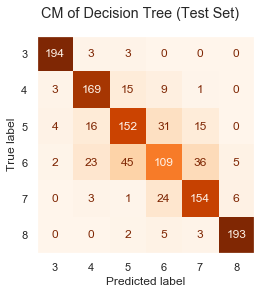

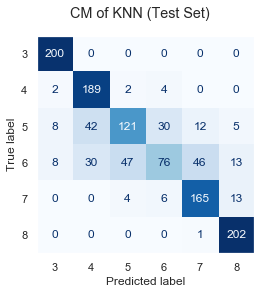

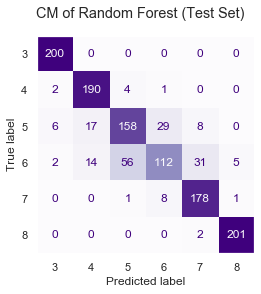

In [33]:
disp = plot_confusion_matrix(classifier_dt, 
                      X_test_scaled, y_test_scaled, 
                      colorbar=False, cmap=plt.cm.Oranges)
disp.figure_.suptitle("CM of Decision Tree (Test Set)")
plt.grid(False)
plt.show()


disp = plot_confusion_matrix(classifier_knn, 
                      X_test_scaled, y_test_scaled, 
                      colorbar=False, cmap=plt.cm.Blues)
disp.figure_.suptitle("CM of KNN (Test Set)")
plt.grid(False)
plt.show()


disp = plot_confusion_matrix(classifier_rf, 
                      X_test_scaled, y_test_scaled, 
                      colorbar=False, cmap=plt.cm.Purples)
disp.figure_.suptitle("CM of Random Forest (Test Set)")
plt.grid(False)
plt.show()

### Comparisions of all models

In [34]:
models = [
    ('Decision Tree Classification',accuracy_dt_train,accuracy_dt_test,macro_precision_dt_train,macro_precision_dt_test,
     macro_recall_dt_train,macro_recall_dt_test,macro_f1_dt_train,macro_f1_dt_test),
    ('K-Nearest Neighbors (KNN)',accuracy_knn_train,accuracy_knn_test,macro_precision_knn_train,macro_precision_knn_test,
     macro_recall_knn_train,macro_recall_knn_test,macro_f1_knn_train,macro_f1_knn_test),
    ('Random Forest Tree Classification',accuracy_rf_train,accuracy_rf_test,macro_precision_rf_train,macro_precision_rf_test,
     macro_recall_rf_train,macro_recall_rf_test,macro_f1_rf_train,macro_f1_rf_test),
         ]

predict = pd.DataFrame(data = models,
                       columns=['Model','Accuracy(train)','Accuracy(test)',
                                'Macro Precision(train)','Macro Precision(test)',
                                'Macro Recall(train)','Macro Recall(test)',
                                'Macro F1(train)','Macro F1(test)'])
predict

,Model,Accuracy(train),Accuracy(test),Macro Precision(train),Macro Precision(test),Macro Recall(train),Macro Recall(test),Macro F1(train),Macro F1(test)
0,Decision Tree Classification,1.000000,0.792007,1.000000,0.789652,1.000000,0.798410,1.00000,0.792395
1,K-Nearest Neighbors (KNN),0.858741,0.777325,0.853046,0.765951,0.855483,0.788771,0.84917,0.763262
2,Random Forest Tree Classification,1.000000,0.847471,1.000000,0.844006,1.000000,0.855881,1.00000,0.844733


### Visualizing Models Performance 

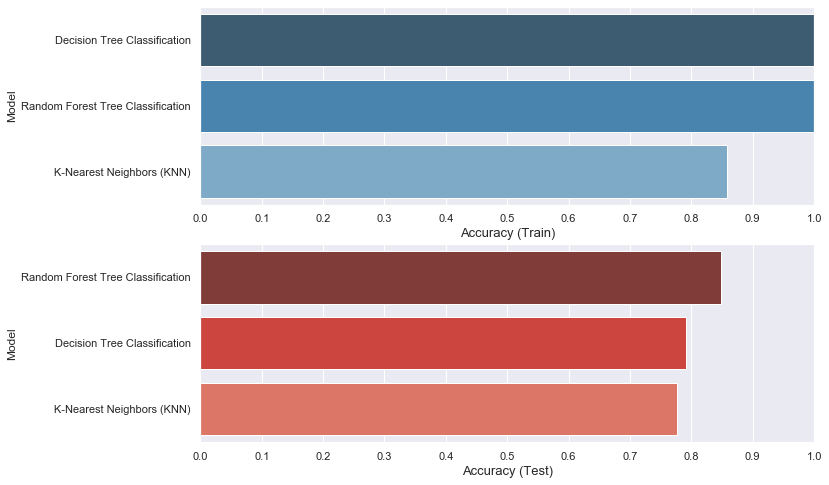

In [35]:
f, axes = plt.subplots(2,1, figsize=(11,8))

predict.sort_values(by=['Accuracy(train)'], ascending=False, inplace=True)
sns.barplot(x='Accuracy(train)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Accuracy (Train)', size=13)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Accuracy(test)'], ascending=False, inplace=True)
sns.barplot(x='Accuracy(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Accuracy (Test)', size=13)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

The best model for our dataset is random forest classification. Although the accuracy rates of the training dataset are high for all 3 models, the random forest model appears to be far ahead in the test dataset. In addition, random forest classification has better results in all other metrics in the test set. 